In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import timeit
import seaborn as sns

#these are user defined modules
import plot
import calculate

### Cohort Analysis

For each (filtered) cohort analyze how the distribution of publications and citations changes in the cohort over time.
At the beginning all scientists should be equal (they have zero publications and citations). Over time some scientists become more productive and/or successful than others which leads to an increase in the Gini coefficient.

In [2]:
start_time = timeit.default_timer()
print(start_time)

1510934444.59


### Read Gender details

In [3]:
# read gender details - the column names are name, gender - change it to author, gender
gender = pd.read_csv('./data/name_gender_1970_2016_noAsians.csv')
gender.rename(columns={'name':'author'}, inplace=True)
print(gender.head())
print(gender['gender'].unique())
print(gender.groupby('gender').size())
#TODO: also show proportion! What is the percentage of men and women?

print(gender['author'].nunique())

             author gender
0    nima mesgarani      m
1    james j. abbas      m
2  eberhart zrenner      m
3    emery n. brown      m
4        ilya rybak      m
['m' 'none' 'f']
gender
f        974493
m       4493870
none     325482
dtype: int64
1129473


### Read authors with start and end year details

In [4]:
CAREER_LENGTH_LIST = [0,5,10,15,20,25]
CAREER_LENGTH = 0
#max_years = 15
#authorStartEndCareerData = pd.read_csv('data/authors-scientific-start-end-year-publish-count.csv')
authorStartEndCareerData = pd.read_csv('./data/authors-scientific-atleast-'+str(CAREER_LENGTH)+'-year.csv')

print('authorStartEndCareerData before filtering - ',authorStartEndCareerData.shape[0])
authorStartEndCareerData = authorStartEndCareerData[authorStartEndCareerData["start_year"] >= 1970]
print('authorStartEndCareerData after filtering - ',authorStartEndCareerData.shape[0])

#authorStartEndCareerData = pd.read_csv('data/authors-scientific-atleast-'+str(CAREER_LENGTH)+'-year.csv')
print(authorStartEndCareerData.head())

#print("authorStartEndCareerData  %s", authorStartEndCareerData.shape[0])
print("author unique names  - ", authorStartEndCareerData['author'].nunique())
#print(authorStartEndCareerData[authorStartEndCareerData['author']=='a min tjoa'])

('authorStartEndCareerData before filtering - ', 1708185)
('authorStartEndCareerData after filtering - ', 1708185)
                  author  start_year  end_year  total_num_pub  career_length
0       'maseka lesaoana        2001      2015              2             14
1  (max) zong-ming cheng        2009      2011              2              2
2       (zhou) bryan bai        2011      2012              2              1
3                  a lun        2010      2010              1              0
4             a min tjoa        1979      2015            193             36
('author unique names  - ', 1708185)


### Merge credible authors and their gender information

In [5]:
authorStartEndCareerData = pd.merge(authorStartEndCareerData, gender, how="left", on=["author"])
# for authors whose gender not found, replace it with none
authorStartEndCareerData['gender'] = authorStartEndCareerData['gender'].fillna('none')
print(authorStartEndCareerData.head())

print("authorStartEndCareerData with duplicates: %s", authorStartEndCareerData.shape[0])
authorStartEndCareerData = authorStartEndCareerData.drop_duplicates()
print("authorStartEndCareerData no duplicates: %s", authorStartEndCareerData.shape[0])
# print(authorStartEndCareerData['author'].nunique())

#axes = authorStartEndCareerData.boxplot(column='pub_count', by='gender', return_type='axes')
#for ax in axes.values():
#    ax.set_ylim(0, 200)
#plt.show()

                  author  start_year  end_year  total_num_pub  career_length  \
0       'maseka lesaoana        2001      2015              2             14   
1       'maseka lesaoana        2001      2015              2             14   
2  (max) zong-ming cheng        2009      2011              2              2   
3       (zhou) bryan bai        2011      2012              2              1   
4                  a lun        2010      2010              1              0   

  gender  
0   none  
1   none  
2   none  
3   none  
4   none  
('authorStartEndCareerData with duplicates: %s', 6372557)
('authorStartEndCareerData no duplicates: %s', 1708185)


### Read Publication data

In [6]:
authorPublicationData = pd.read_csv('./data/author_publications_1970_2016_asiansAsNone.txt')
print('authorPublicationData before filtering - ',authorPublicationData.shape[0])
authorPublicationData = authorPublicationData[authorPublicationData["year"] >= 1970]
print('authorPublicationData after filtering - ',authorPublicationData.shape[0])

authorPublicationData = authorPublicationData.groupby(['year','author']).count().reset_index()
authorPublicationData.rename(columns={'pub_id':'num_pub'}, inplace=True)
print(authorPublicationData.head())

##remove wrong data
#authorPublicationData = authorPublicationData[authorPublicationData["year"] > 1900]
#print(authorPublicationData[authorPublicationData.author=="a min tjoa"])

('authorPublicationData before filtering - ', 9078240)
('authorPublicationData after filtering - ', 9078240)
   year         author  num_pub
0  1970    a. a. afifi        1
1  1970    a. a. bährs        1
2  1970     a. armenti        1
3  1970  a. b. slomson        1
4  1970    a. brindley        1


### Merge Publications with credible authors and their gender information

('authorPublicationData before filtering: %s', 4704589)
('authorPublicationData after filtering: %s', 4704589)
('authorPublicationData with duplicates: %s', 4704589)
('authorPublicationData no duplicates: %s', 4704589)
1708185
   year         author  num_pub  start_year  end_year  total_num_pub  \
0  1970    a. a. afifi        1        1970      1970              1   
1  1970    a. a. bährs        1        1970      1970              1   
2  1970     a. armenti        1        1970      1970              1   
3  1970  a. b. slomson        1        1970      1970              1   
4  1970    a. brindley        1        1970      2002              2   

   career_length gender  
0              0   none  
1              0   none  
2              0   none  
3              0   none  
4             32   none  


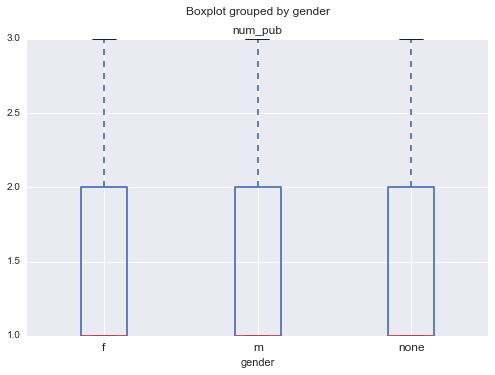

In [7]:
authorPublicationData = pd.merge(authorPublicationData, authorStartEndCareerData,  
                                          how="left", left_on="author", right_on="author")

print("authorPublicationData before filtering: %s", authorPublicationData.shape[0])
authorPublicationData = authorPublicationData.dropna(how='any')
print("authorPublicationData after filtering: %s", authorPublicationData.shape[0])

print("authorPublicationData with duplicates: %s", authorPublicationData.shape[0])
authorPublicationData = authorPublicationData.drop_duplicates()
print("authorPublicationData no duplicates: %s", authorPublicationData.shape[0])

#print(authorPublicationData.head(n=2))
print(authorPublicationData['author'].nunique())
#print(authorPublicationData.shape[0])

print(authorPublicationData.head())
#print(authorPublicationData[authorPublicationData.author=="a min tjoa"])


authorPublicationData.boxplot(column='num_pub', by='gender', showfliers=False)
plt.show()

### Cohort Analysis on all authors for 15 years

In [8]:
groupByYearData = authorPublicationData.copy(deep=True)
print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))
groupByYearData = calculate.groupDataAndCalculateCumulativeValues(groupByYearData, 1, 'num_pub')
print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))

        year            author  num_pub  start_year  end_year  total_num_pub  \
88431   1985  donatella sciuto        1        1985      2016            348   
117504  1987  donatella sciuto        1        1985      2016            348   
135512  1988  donatella sciuto        2        1985      2016            348   
156919  1989  donatella sciuto        1        1985      2016            348   
181582  1990  donatella sciuto        2        1985      2016            348   
210693  1991  donatella sciuto        4        1985      2016            348   
243763  1992  donatella sciuto        4        1985      2016            348   
282907  1993  donatella sciuto        9        1985      2016            348   
329488  1994  donatella sciuto       13        1985      2016            348   
381623  1995  donatella sciuto       15        1985      2016            348   

        career_length gender  
88431              31      f  
117504             31      f  
135512             31     

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


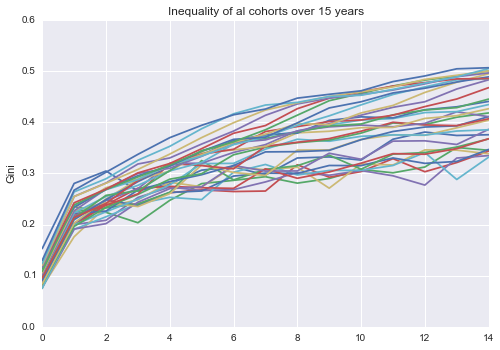

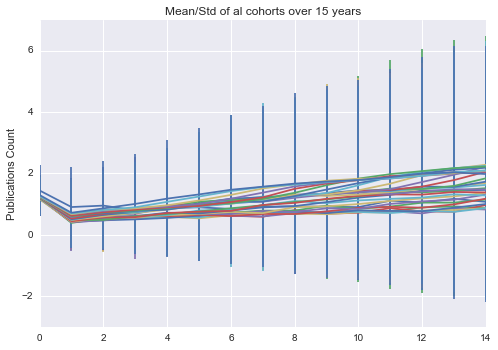

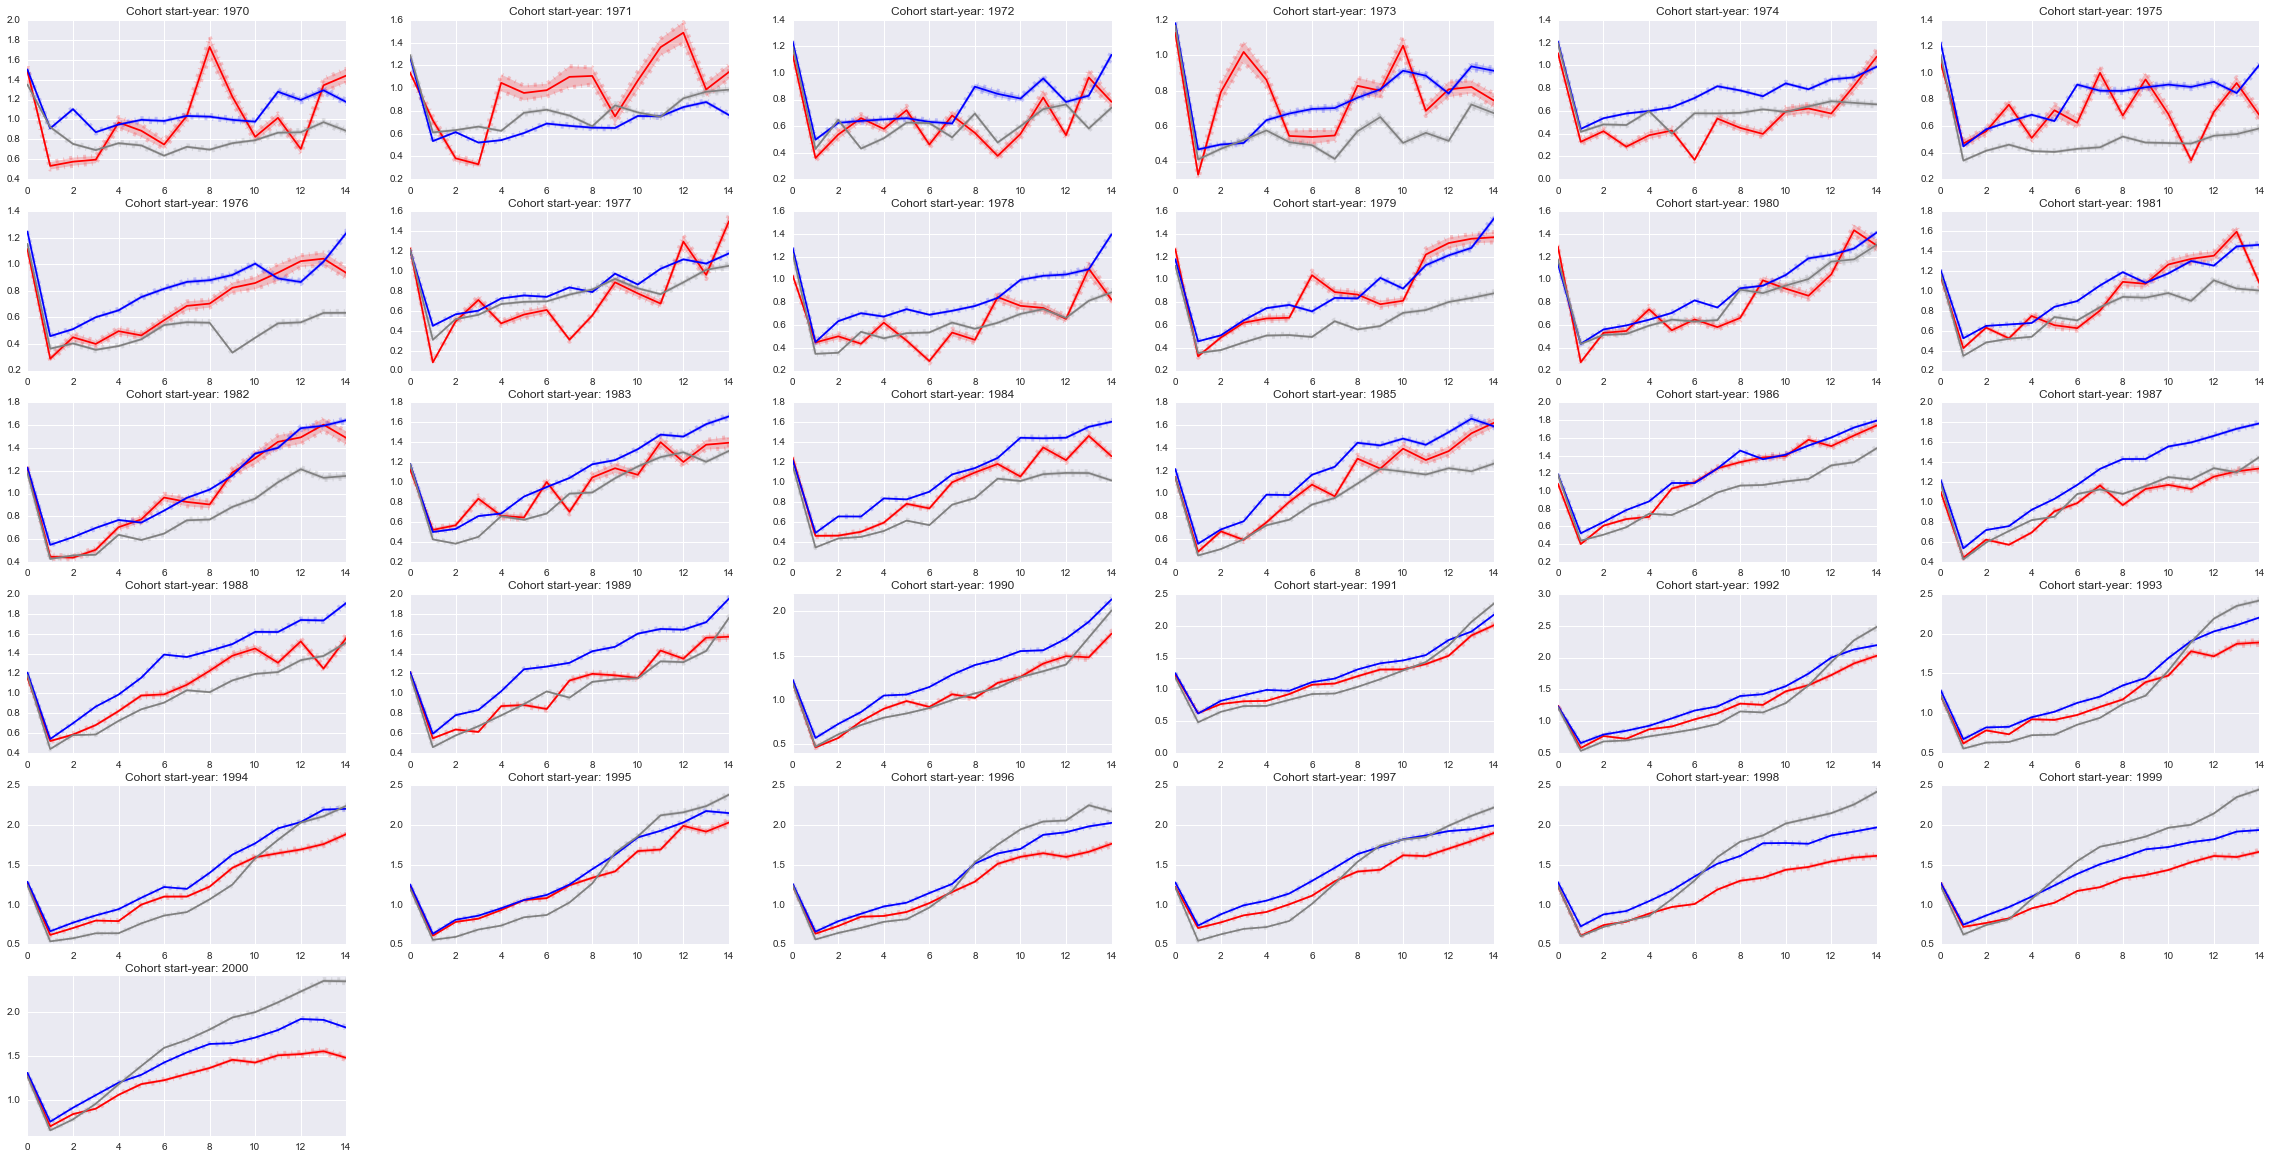

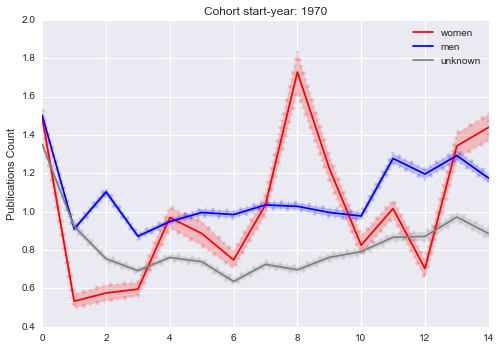

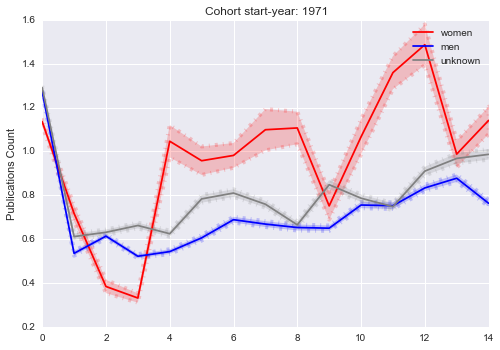

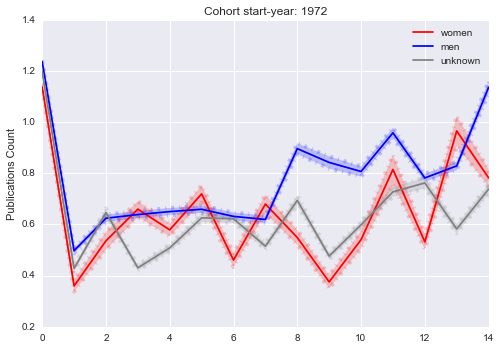

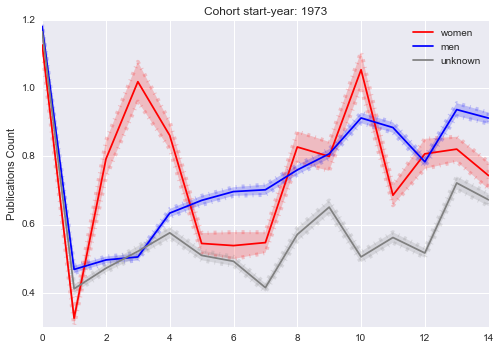

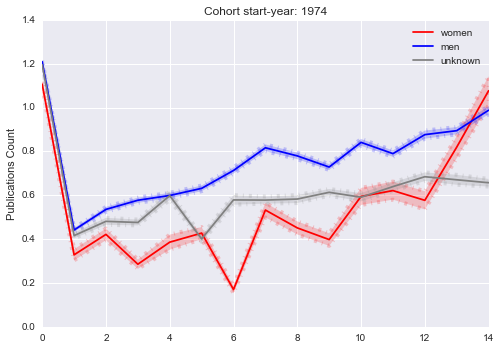

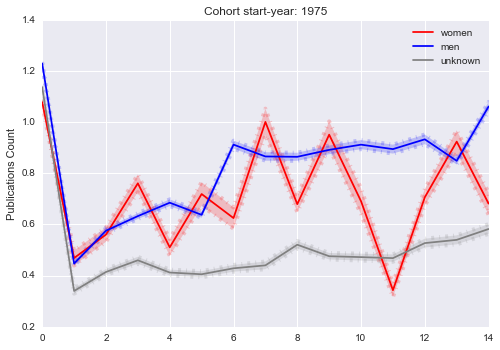

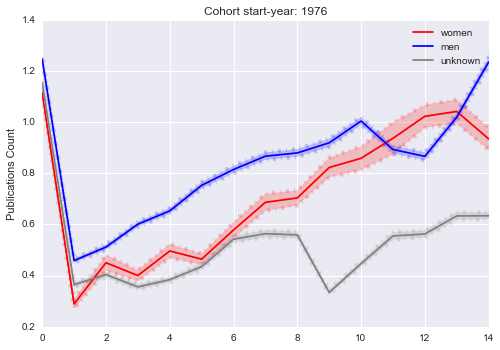

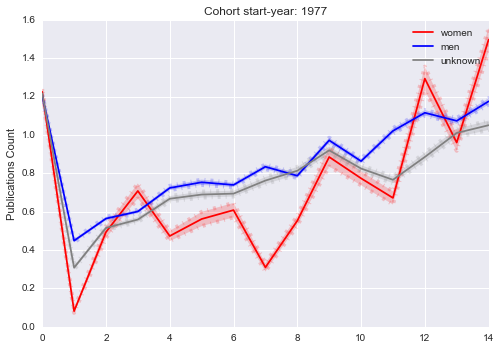

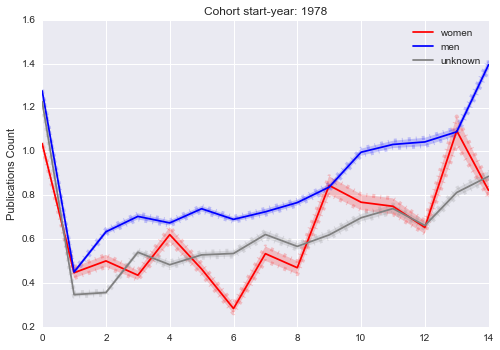

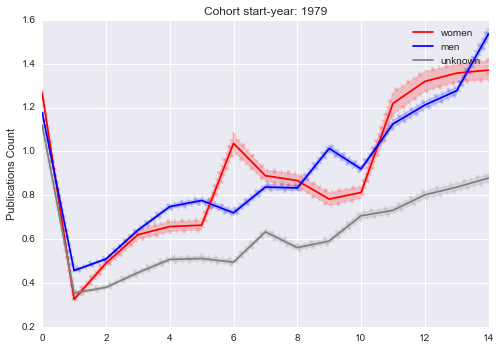

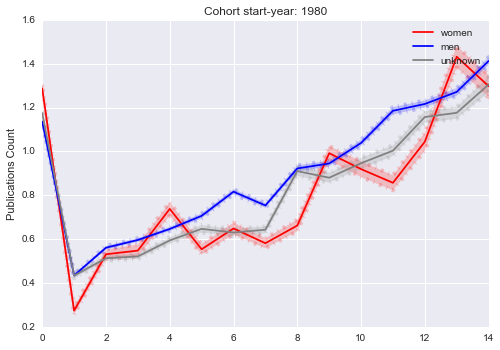

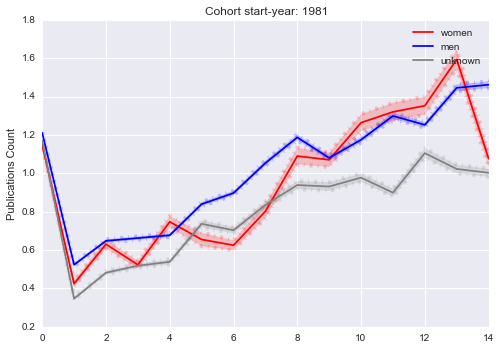

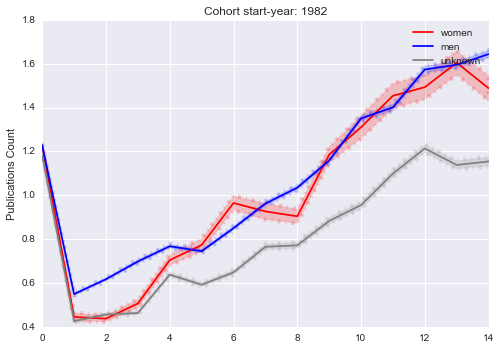

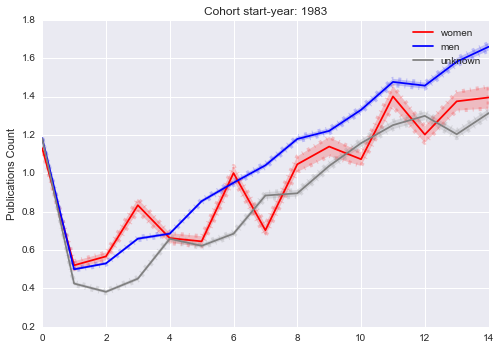

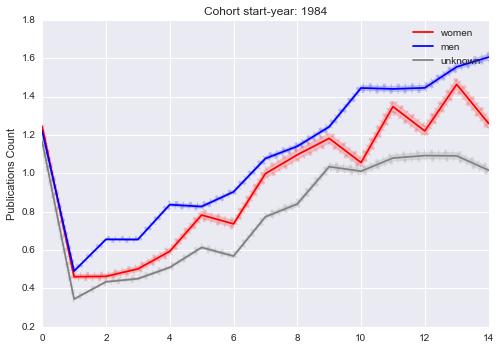

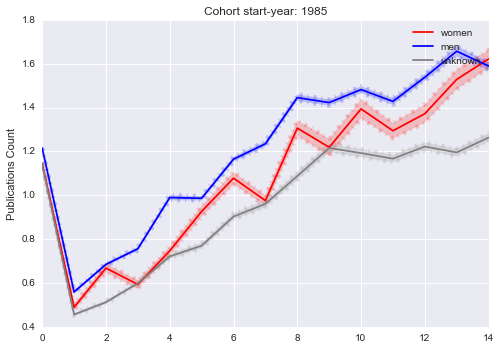

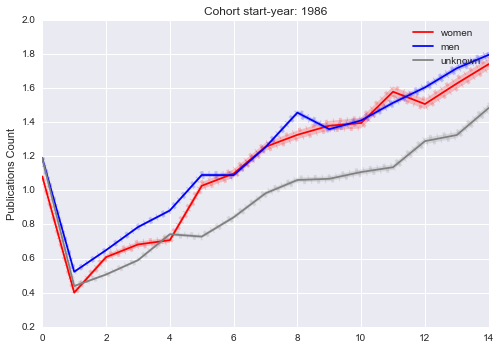

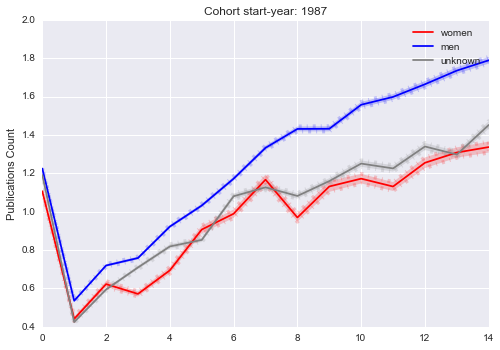

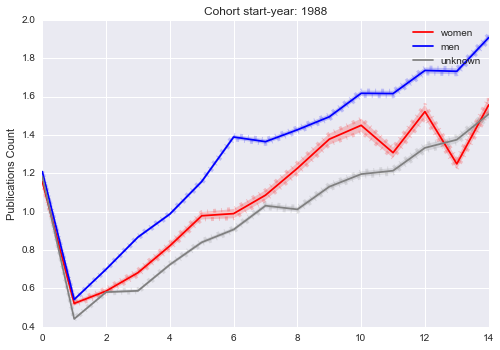

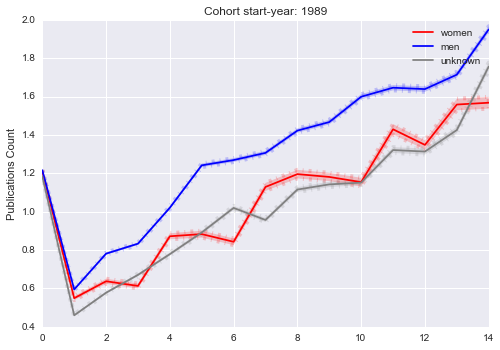

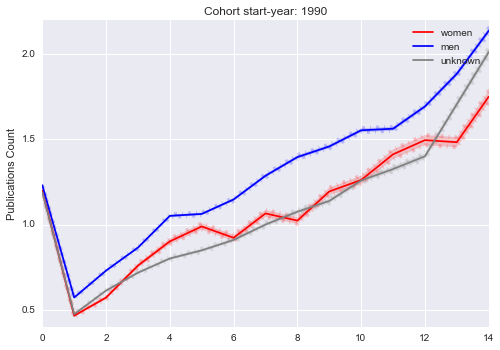

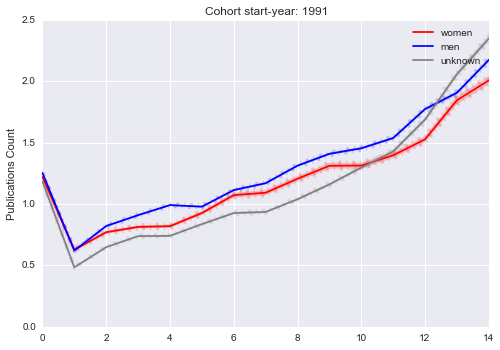

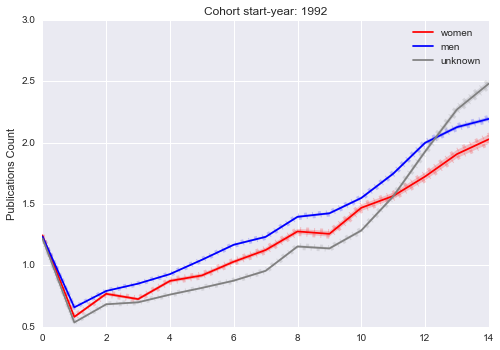

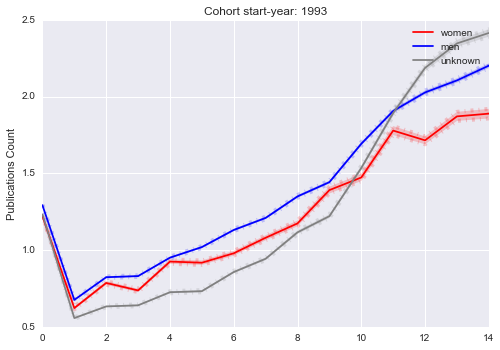

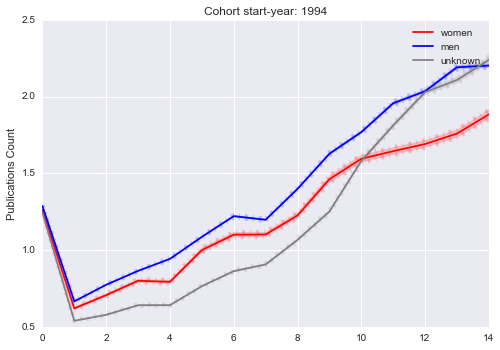

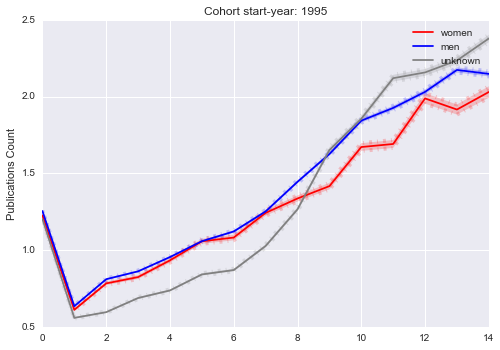

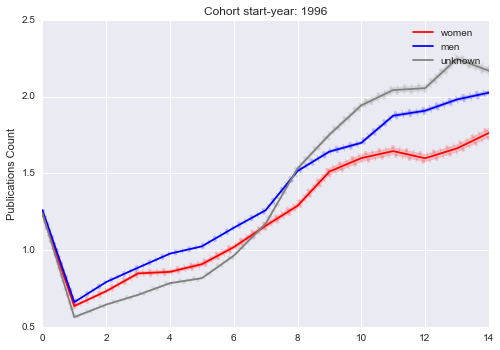

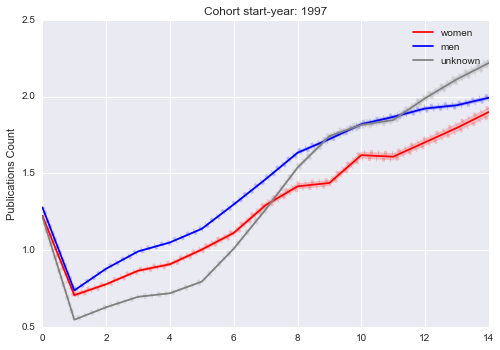

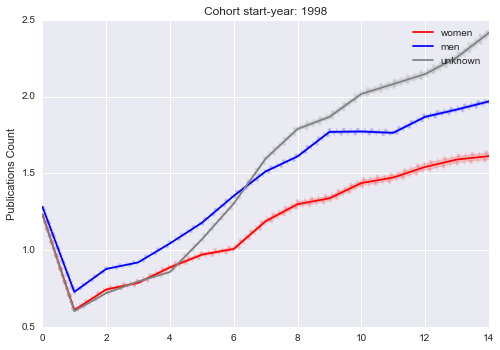

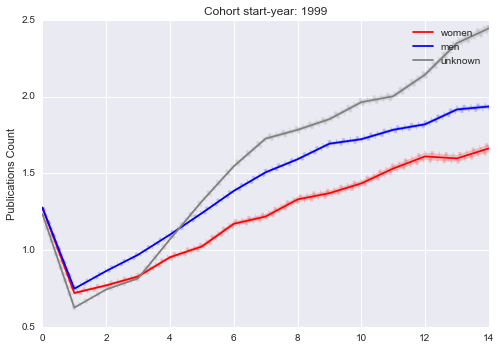

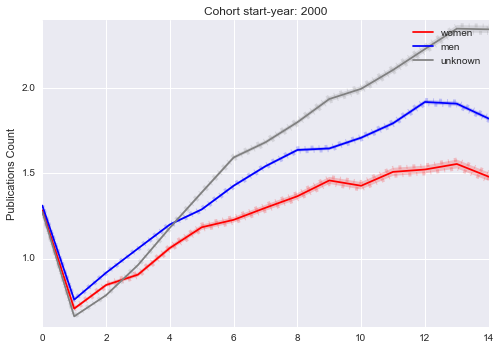

In [9]:
#just for debugging
#reload(plot)
#reload(calculate)
plot.plot_cohort_analysis_on(groupByYearData, 'num_pub', 15, 'Publications Count')

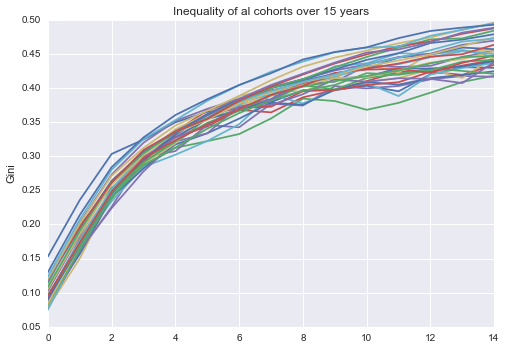

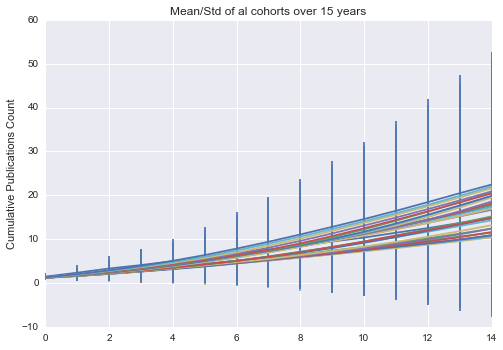

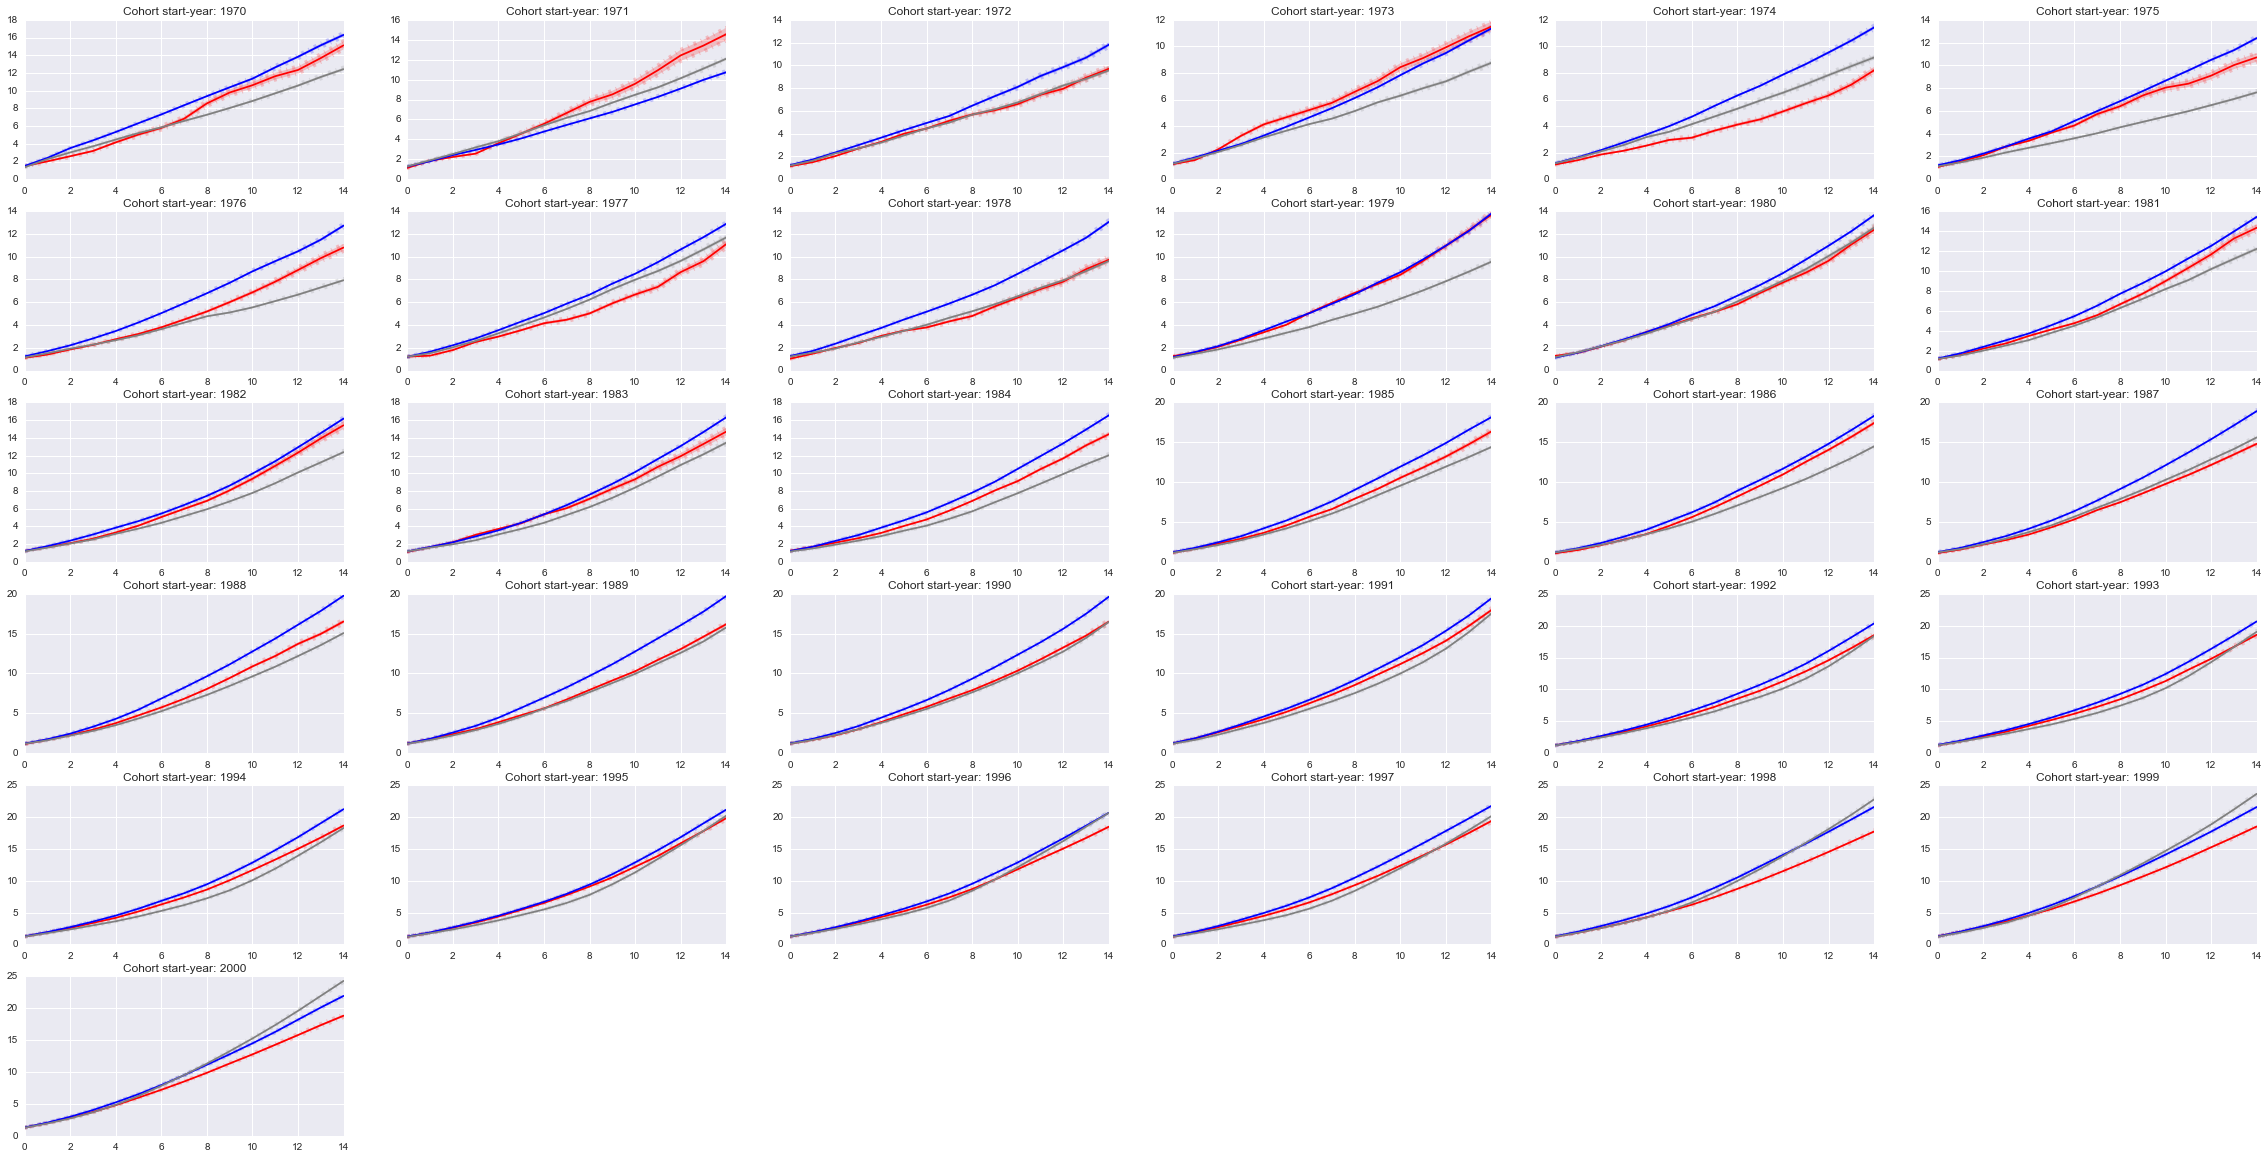

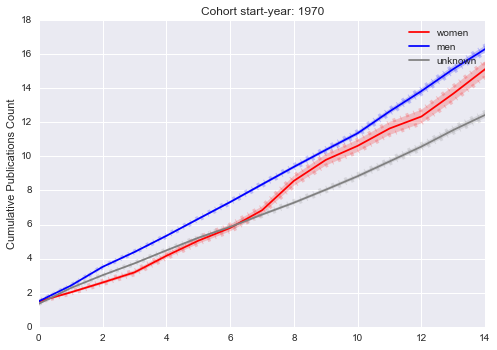

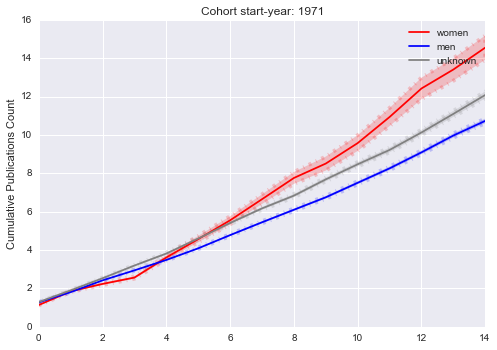

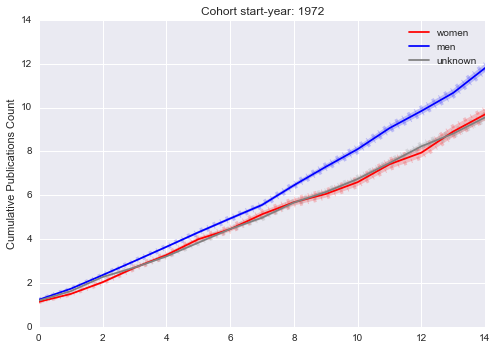

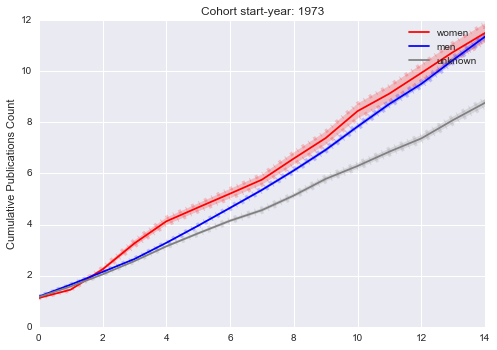

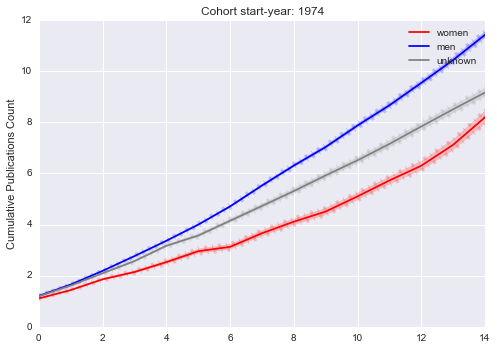

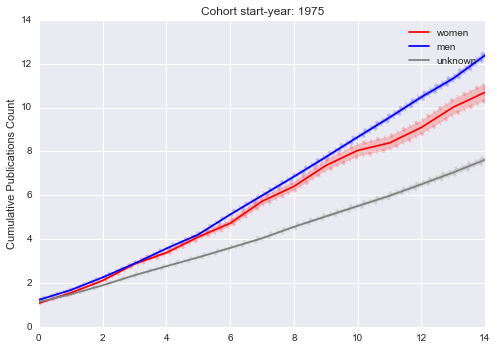

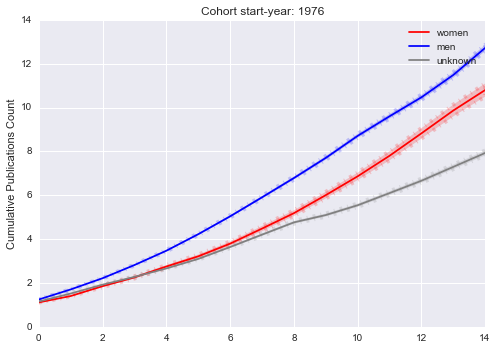

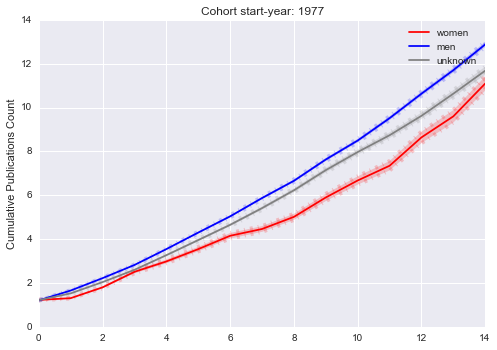

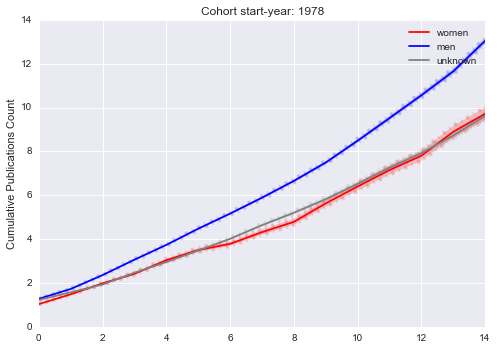

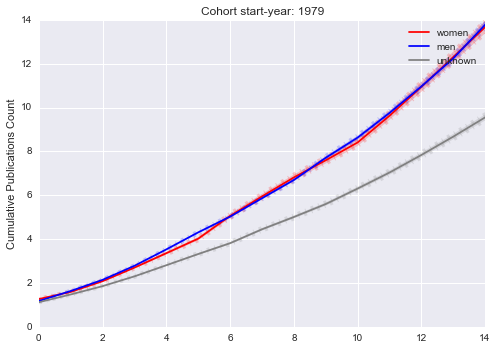

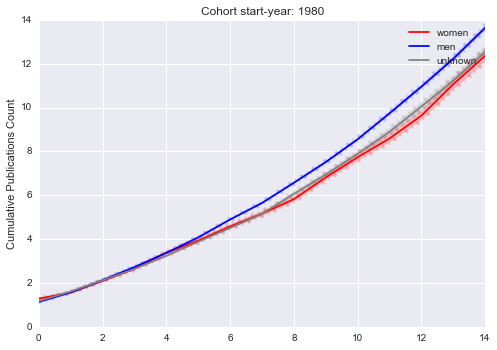

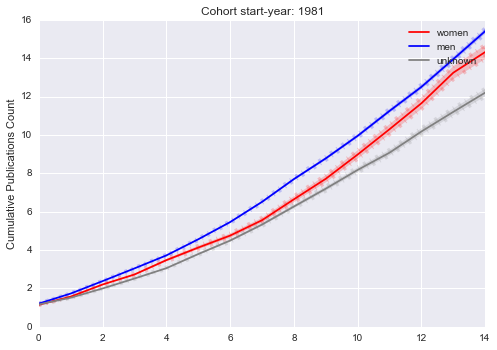

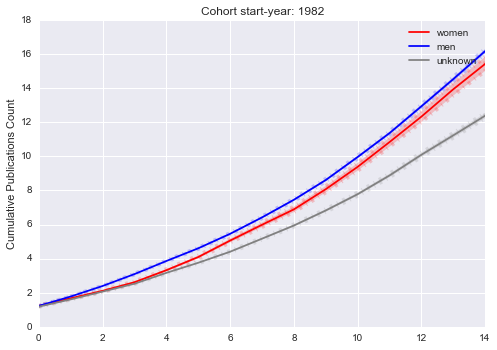

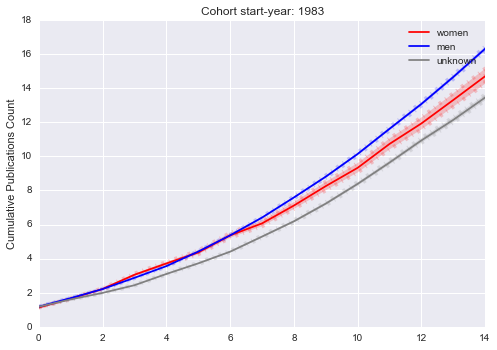

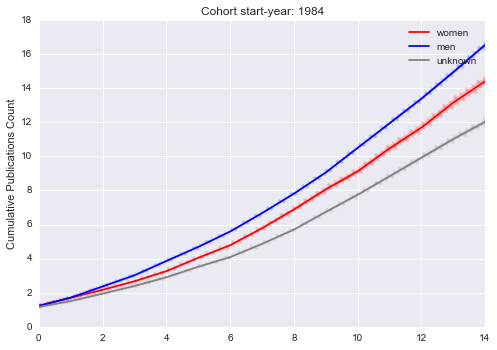

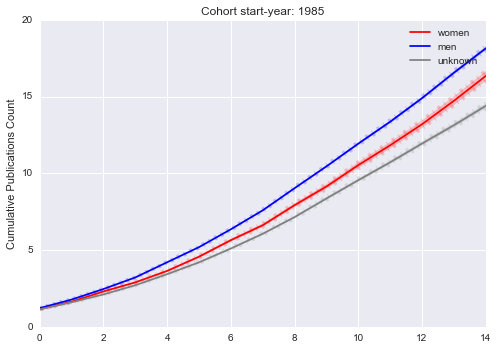

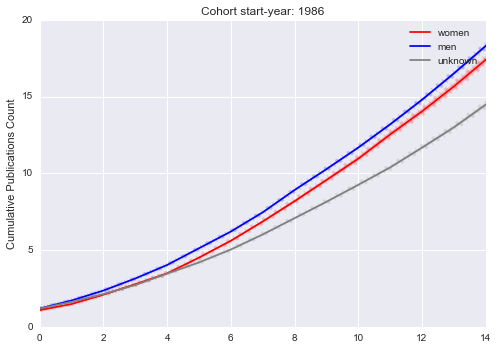

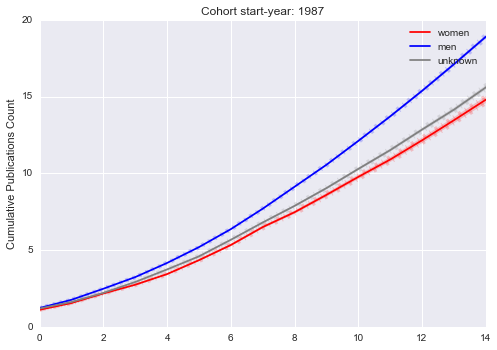

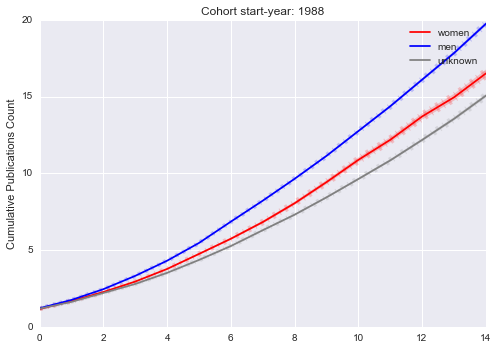

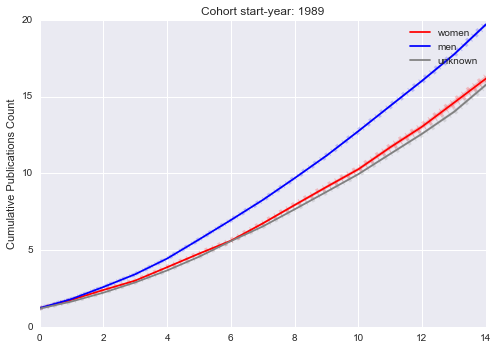

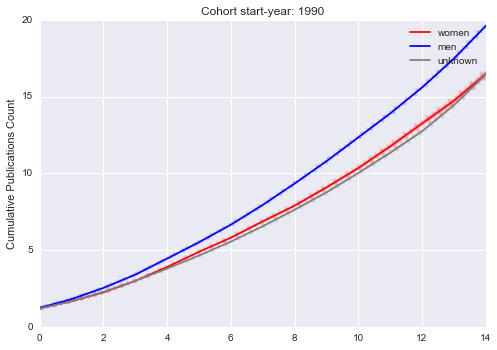

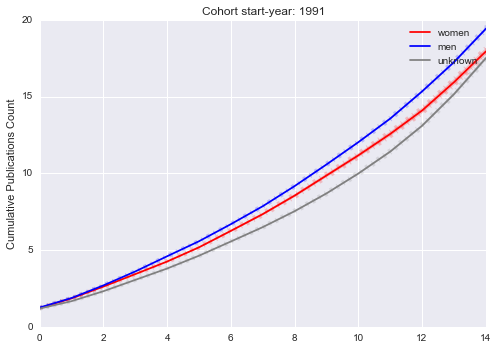

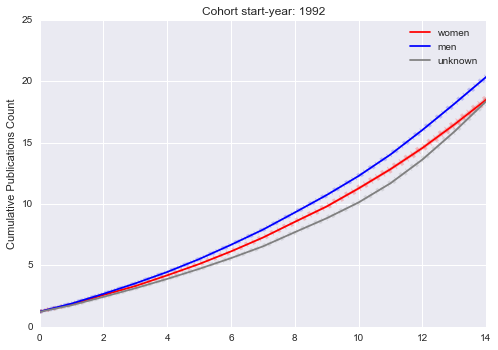

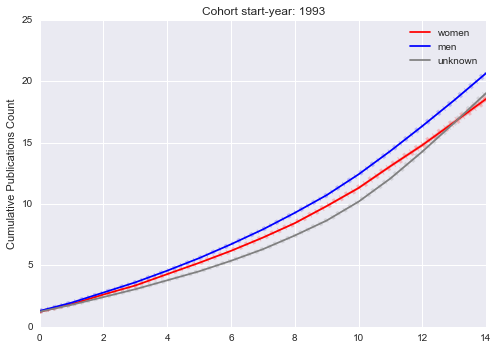

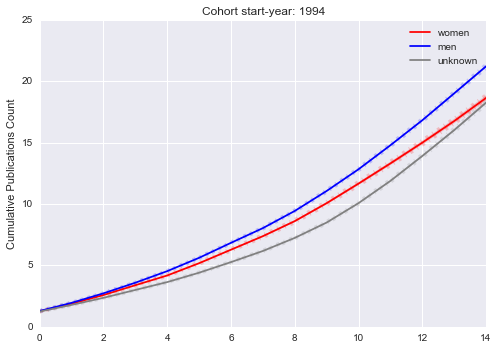

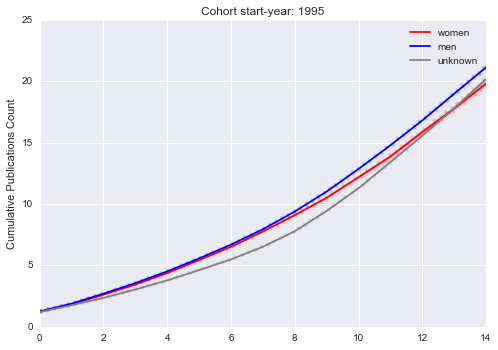

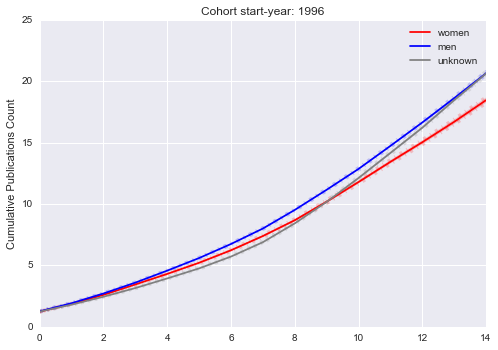

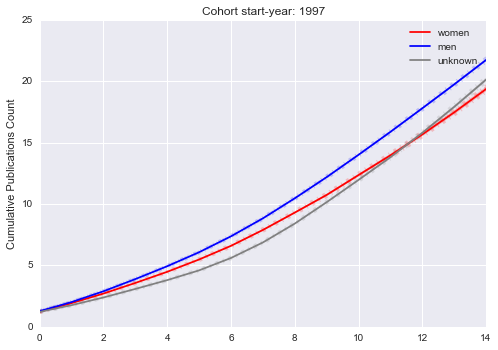

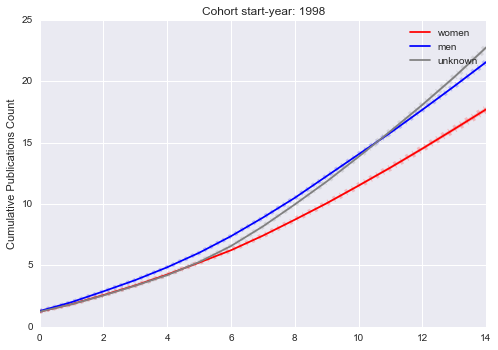

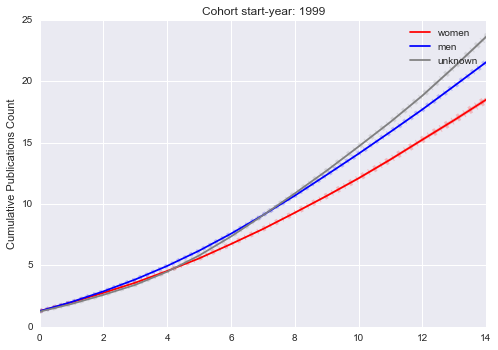

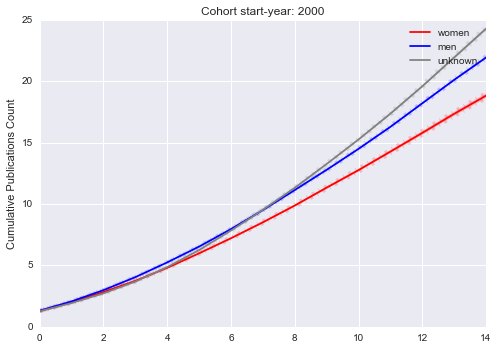

In [10]:
#just for debugging
#reload(plot)
#reload(calculate)

plot.plot_cohort_analysis_on(groupByYearData, 'cum_num_pub', 15, 'Cumulative Publications Count')

#plot.plot_cohort_analysis_on(groupCitationsByAuthorYearData, 'num_cit', 'Citations Count')

### Regression Analysis of mean productivity on Inequality for all authors for 15 years

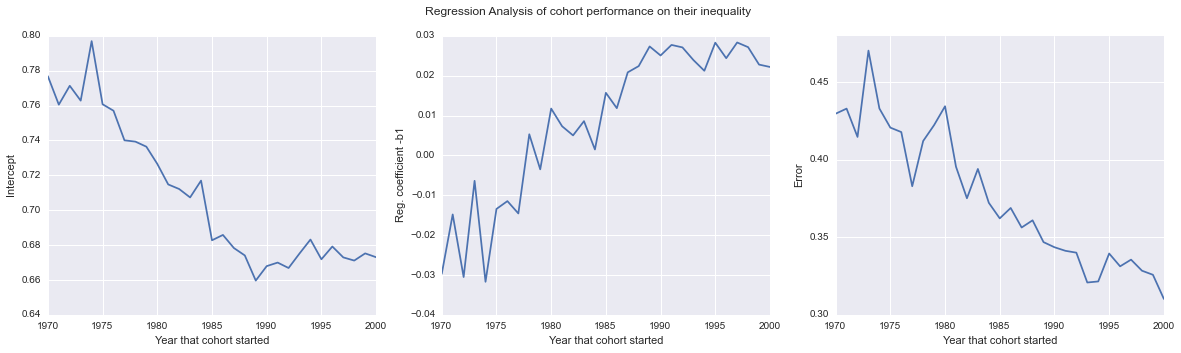

In [11]:
#just for debugging
#reload(plot)
#reload(calculate)
data = plot.plot_regress_performance_on_inequality(groupByYearData, 'num_pub', 15)


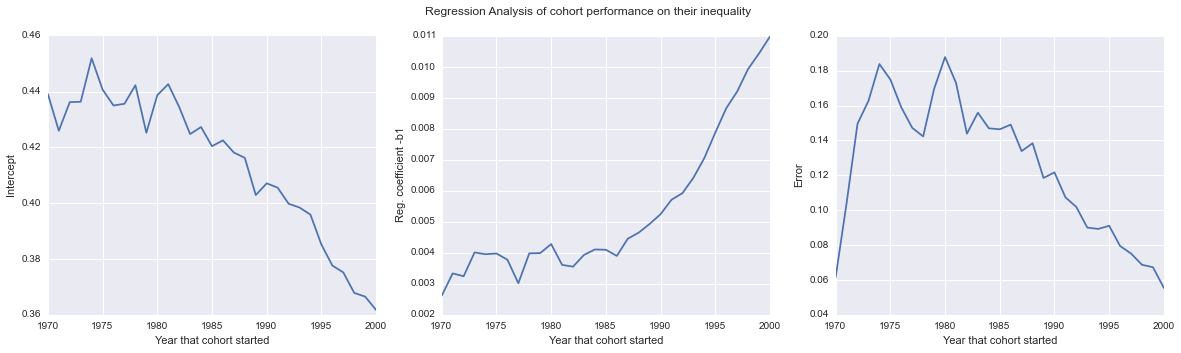

In [12]:
#just for debugging
#reload(plot)
#reload(calculate)
data = plot.plot_regress_performance_on_inequality(groupByYearData, 'cum_num_pub', 15)

### Cohort Analysis, Regression analysis on authors grouped by 2 years for 30 years

        year            author  num_pub  start_year  end_year  total_num_pub  \
88431   1985  donatella sciuto        1        1985      2016            348   
117504  1987  donatella sciuto        1        1985      2016            348   
135512  1988  donatella sciuto        2        1985      2016            348   
156919  1989  donatella sciuto        1        1985      2016            348   
181582  1990  donatella sciuto        2        1985      2016            348   
210693  1991  donatella sciuto        4        1985      2016            348   
243763  1992  donatella sciuto        4        1985      2016            348   
282907  1993  donatella sciuto        9        1985      2016            348   
329488  1994  donatella sciuto       13        1985      2016            348   
381623  1995  donatella sciuto       15        1985      2016            348   

        career_length gender  
88431              31      f  
117504             31      f  
135512             31     

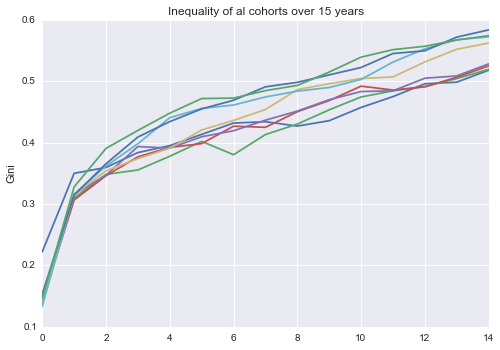

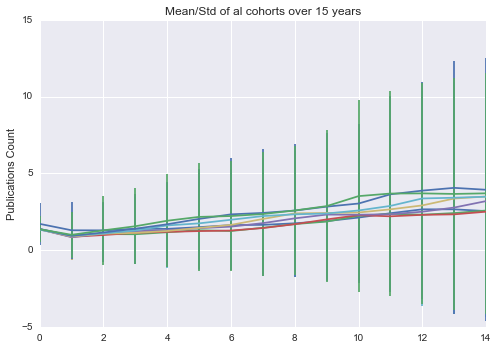

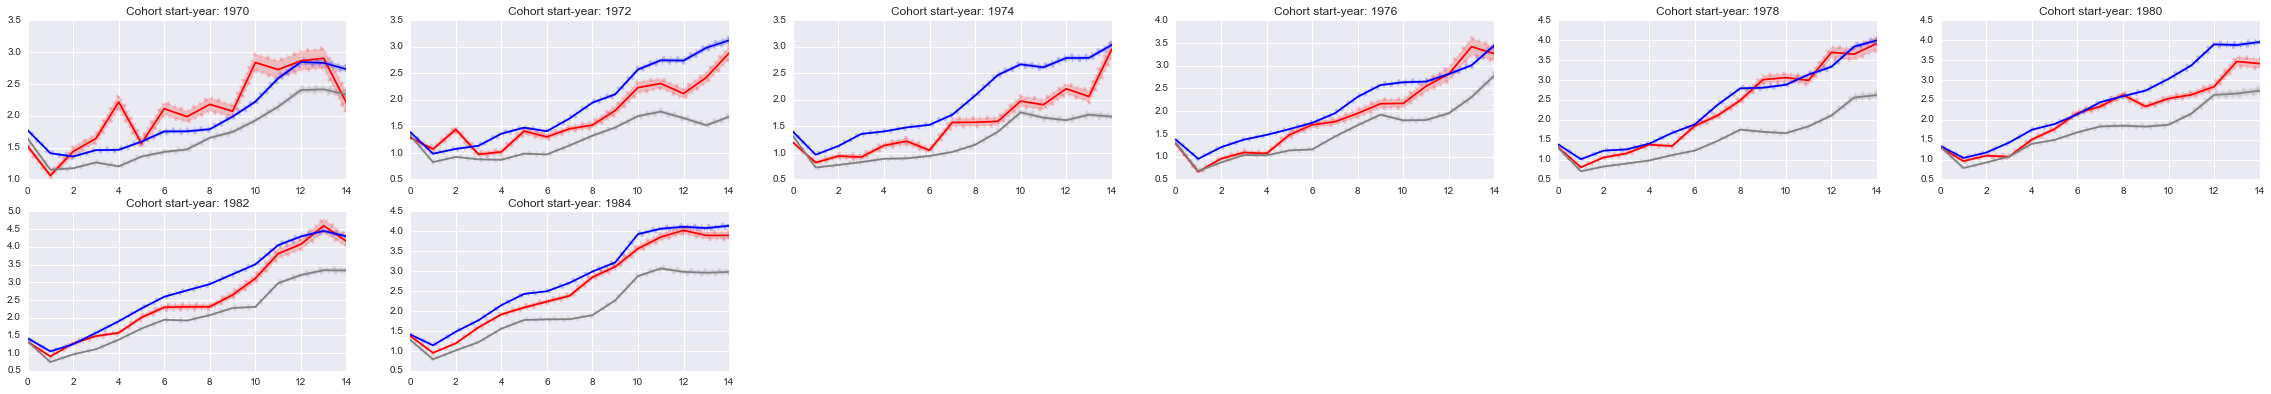

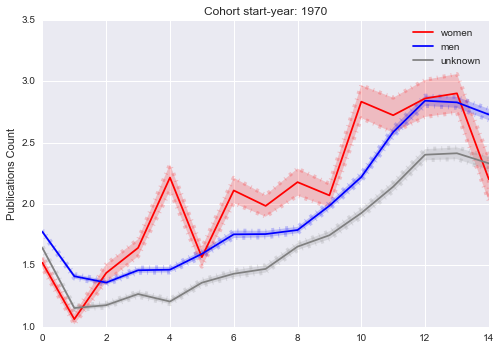

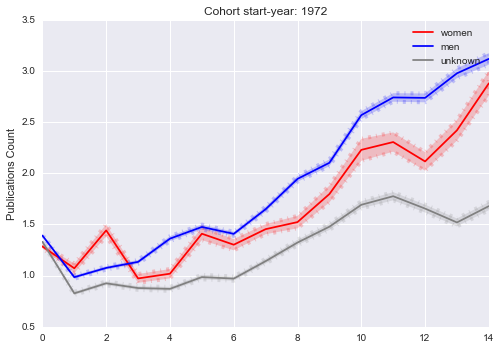

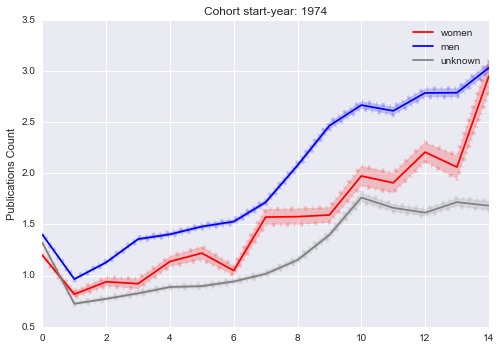

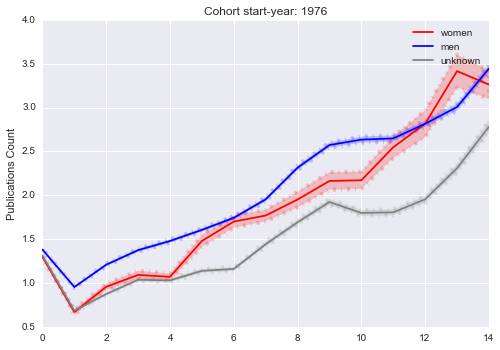

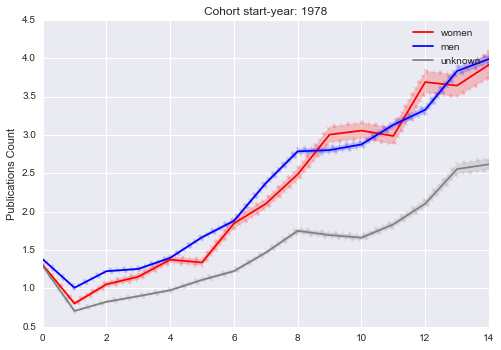

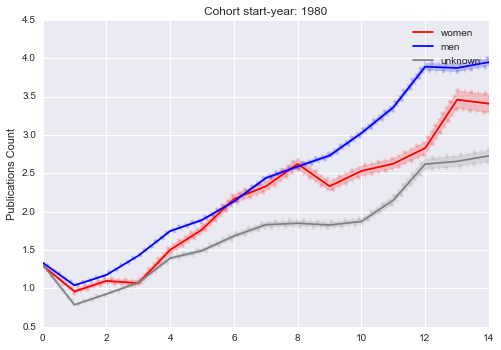

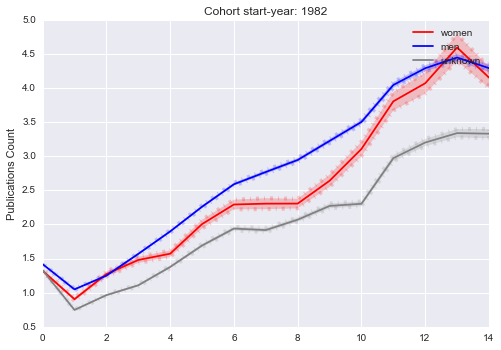

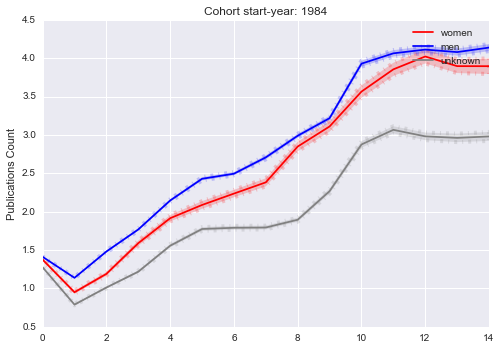

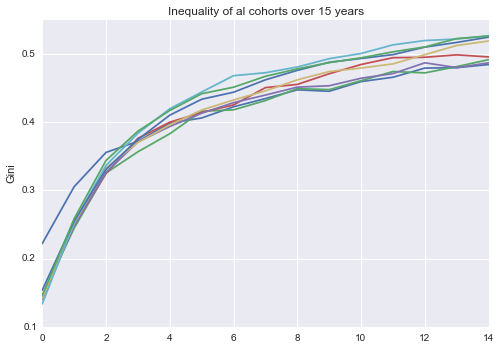

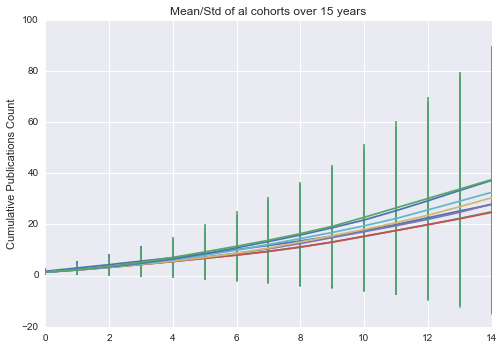

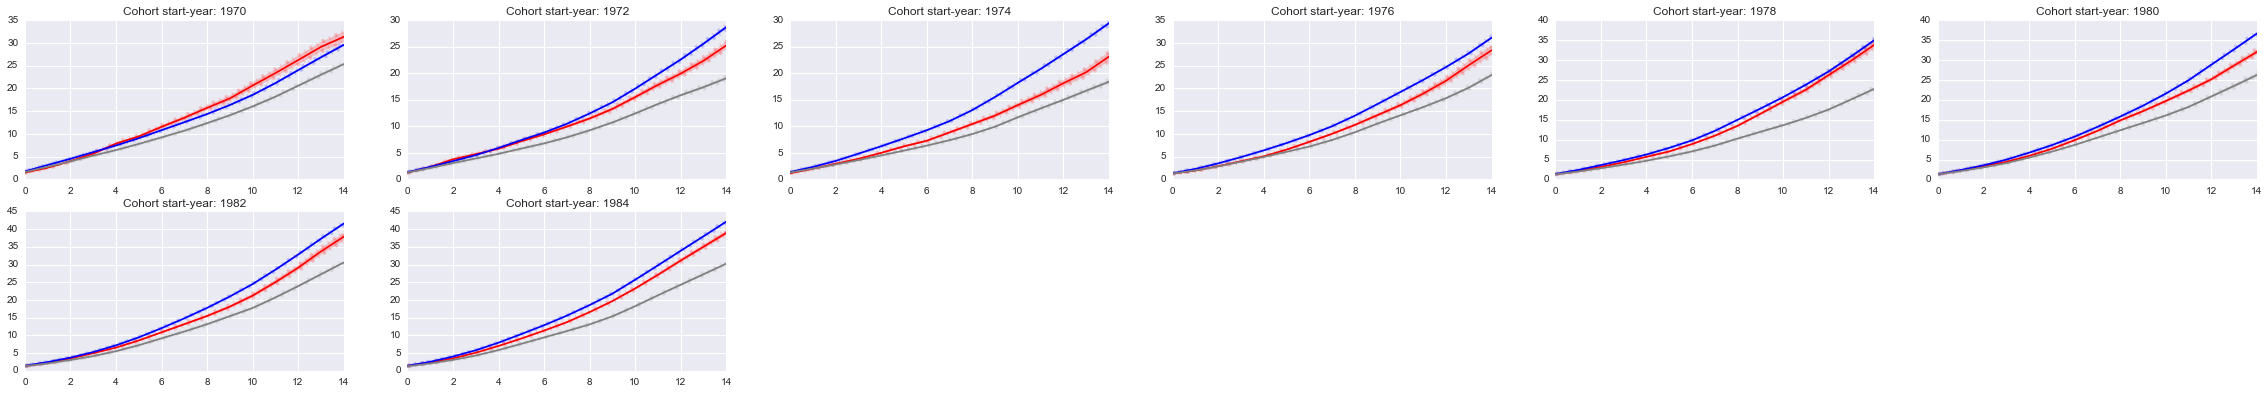

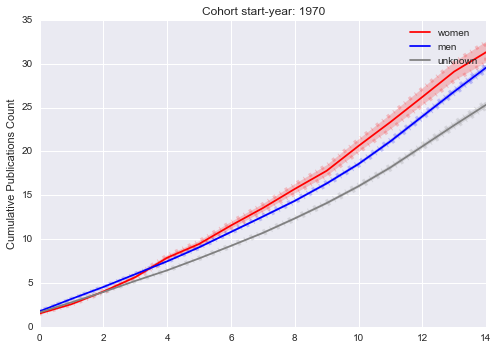

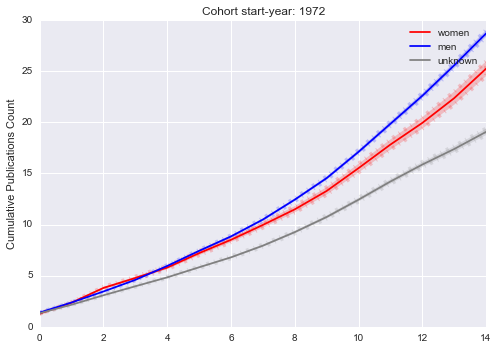

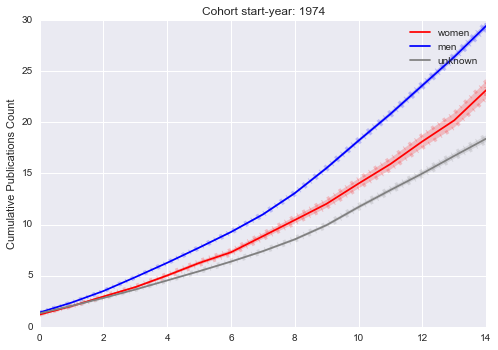

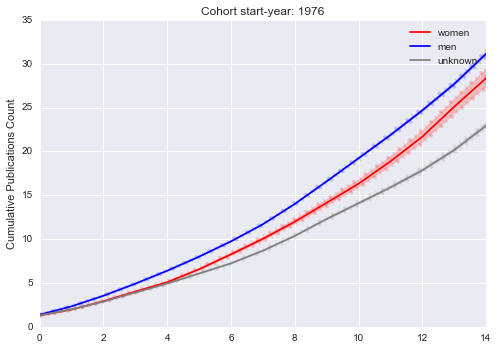

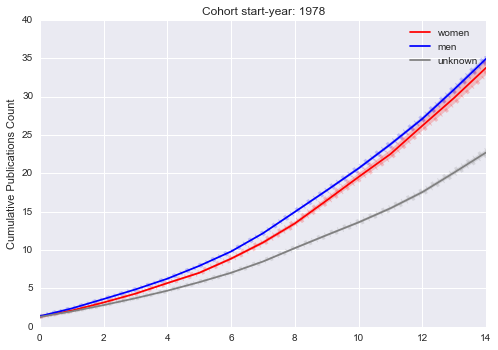

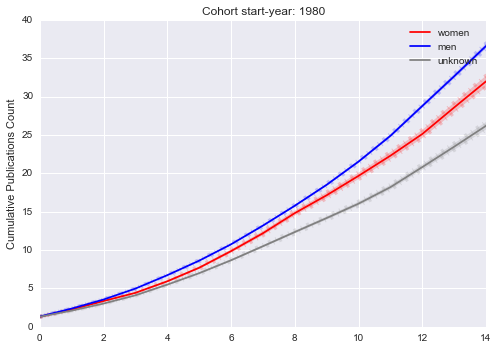

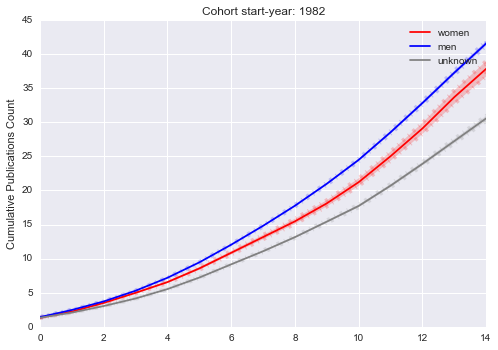

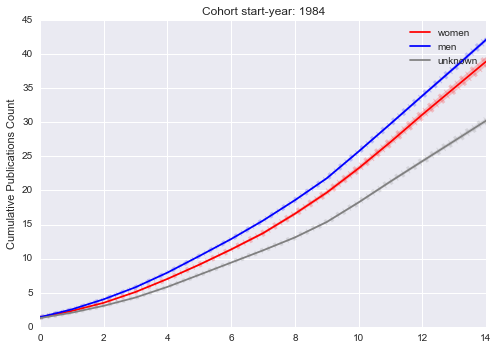

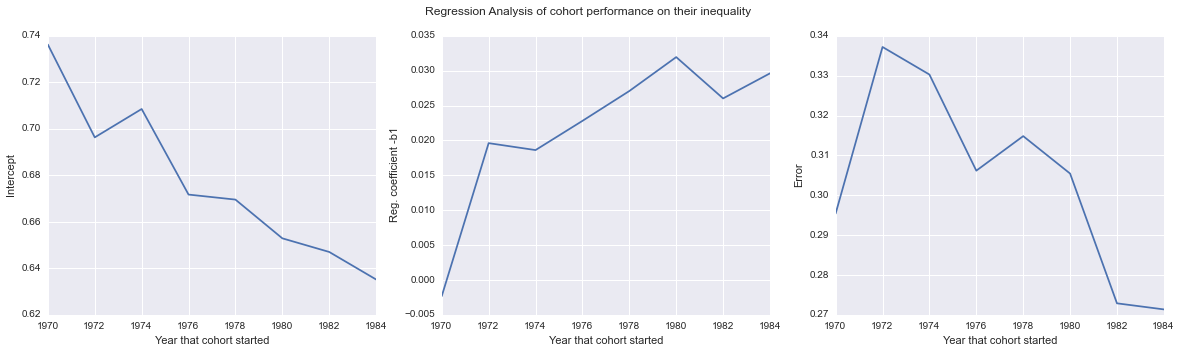

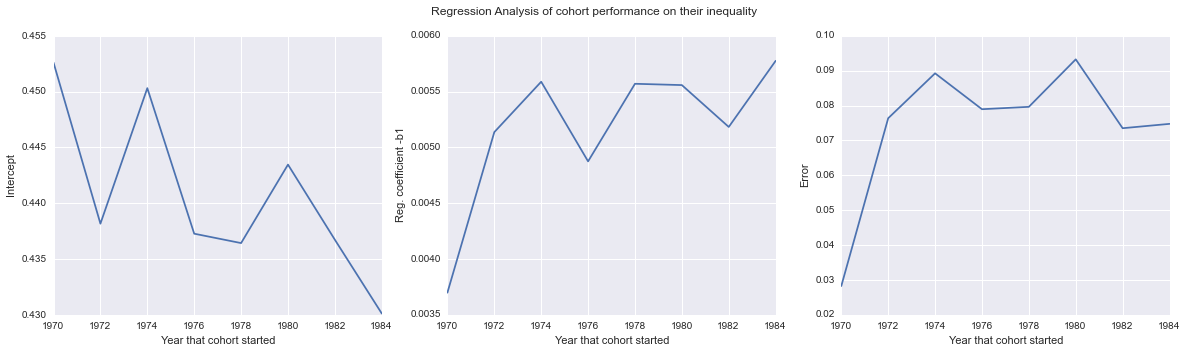

In [13]:
groupByYearData = authorPublicationData.copy(deep=True)
print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))
groupByYearData = calculate.groupDataAndCalculateCumulativeValues(groupByYearData, 2, 'num_pub')
print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))

plot.plot_cohort_analysis_on(groupByYearData, 'num_pub', 15, 'Publications Count')
plot.plot_cohort_analysis_on(groupByYearData, 'cum_num_pub', 15, 'Cumulative Publications Count')
data1 = plot.plot_regress_performance_on_inequality(groupByYearData, 'num_pub', 15)
data2 = plot.plot_regress_performance_on_inequality(groupByYearData, 'cum_num_pub', 15)

### Cohort Analysis, Regression analysis on authors grouped by 3 years for 30 years

        year            author  num_pub  start_year  end_year  total_num_pub  \
88431   1985  donatella sciuto        1        1985      2016            348   
117504  1987  donatella sciuto        1        1985      2016            348   
135512  1988  donatella sciuto        2        1985      2016            348   
156919  1989  donatella sciuto        1        1985      2016            348   
181582  1990  donatella sciuto        2        1985      2016            348   
210693  1991  donatella sciuto        4        1985      2016            348   
243763  1992  donatella sciuto        4        1985      2016            348   
282907  1993  donatella sciuto        9        1985      2016            348   
329488  1994  donatella sciuto       13        1985      2016            348   
381623  1995  donatella sciuto       15        1985      2016            348   

        career_length gender  
88431              31      f  
117504             31      f  
135512             31     

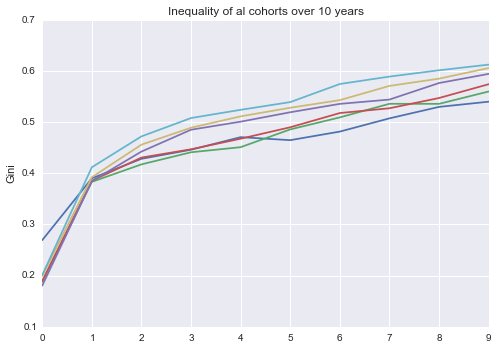

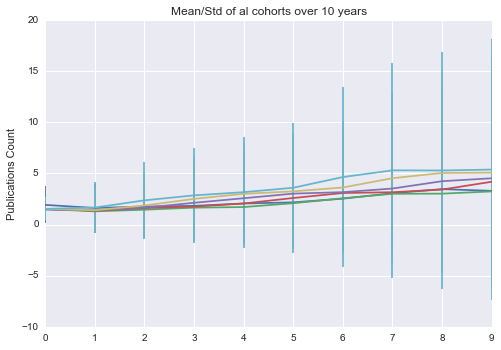

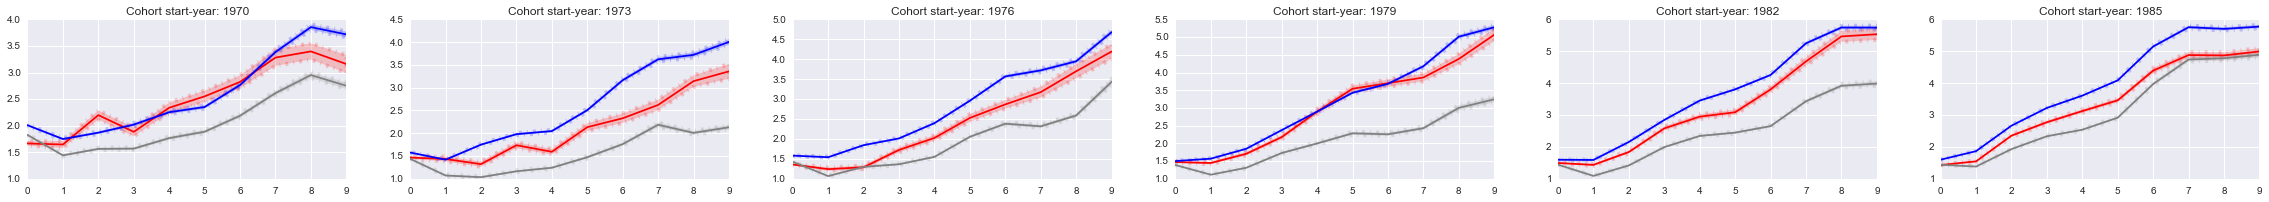

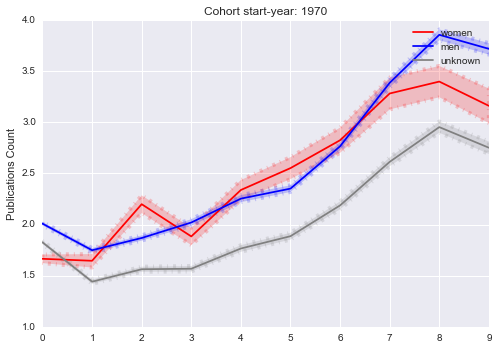

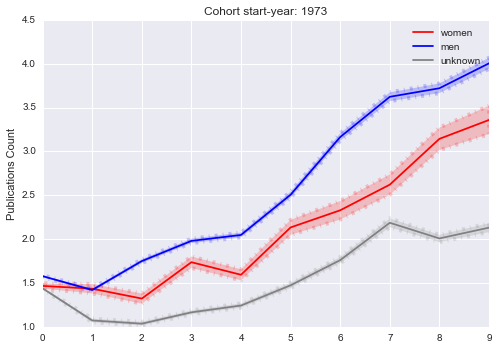

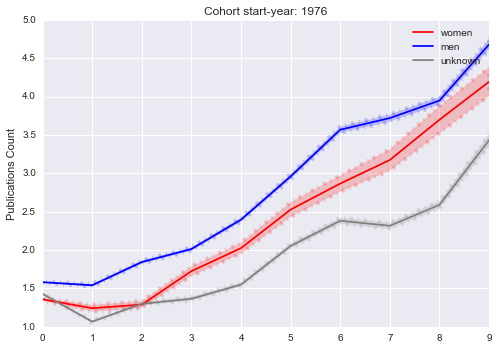

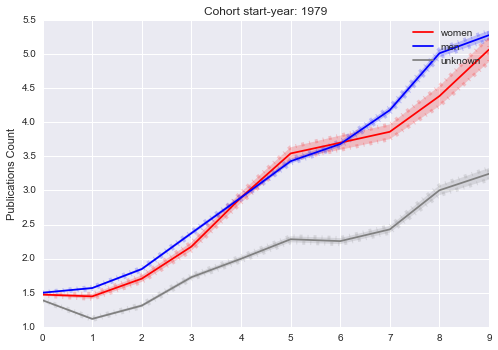

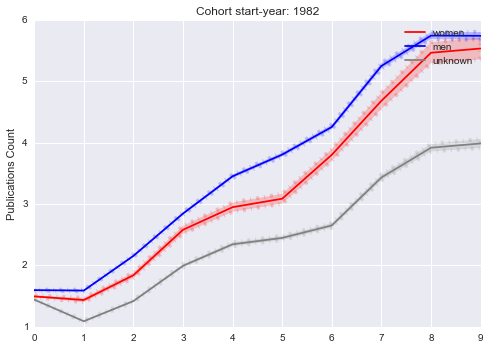

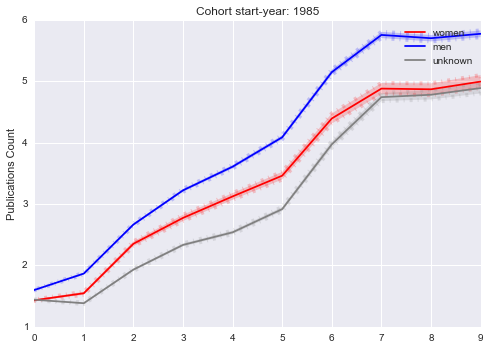

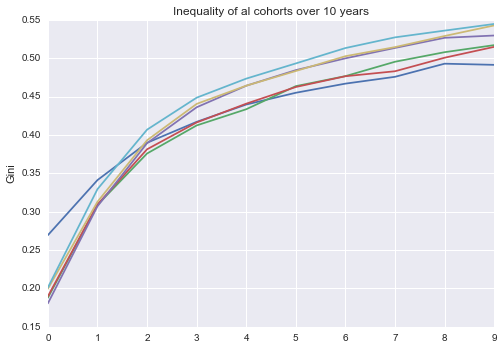

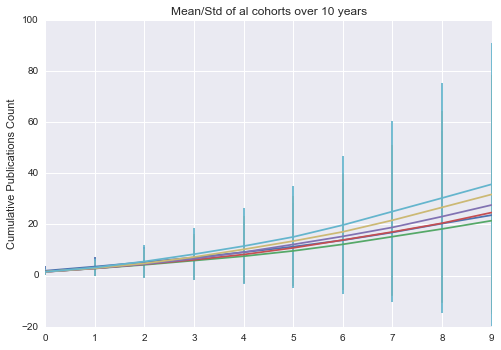

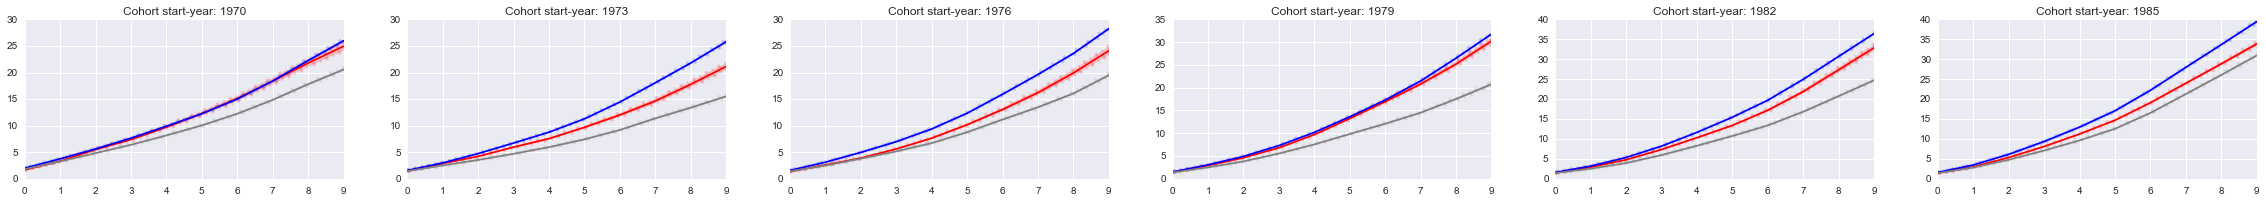

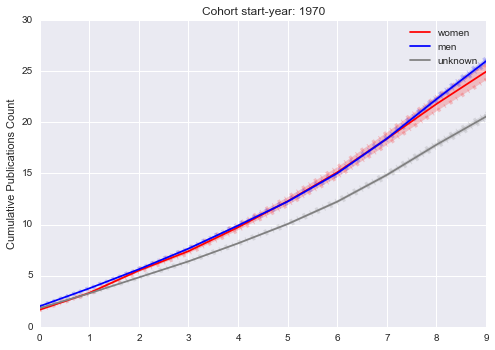

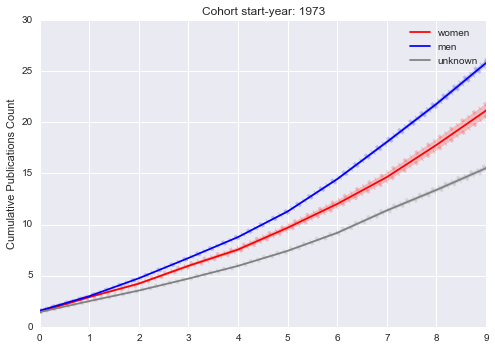

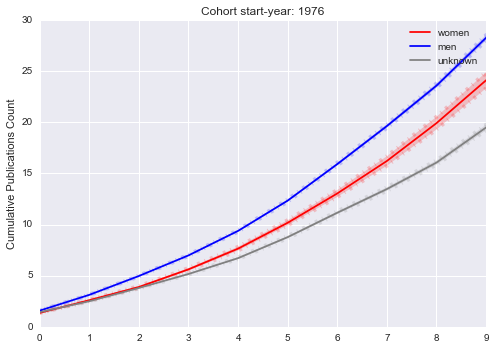

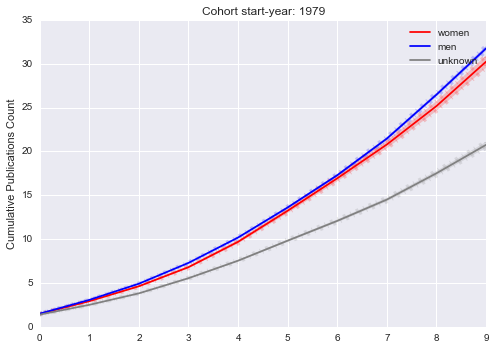

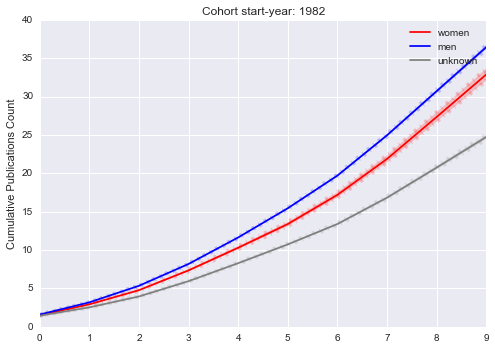

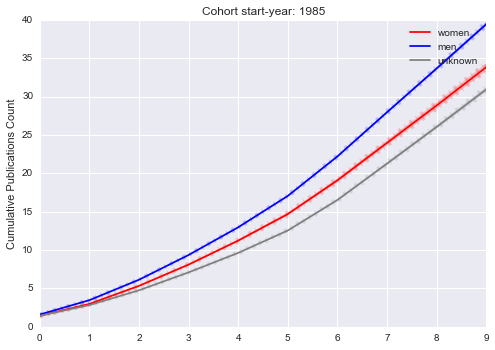

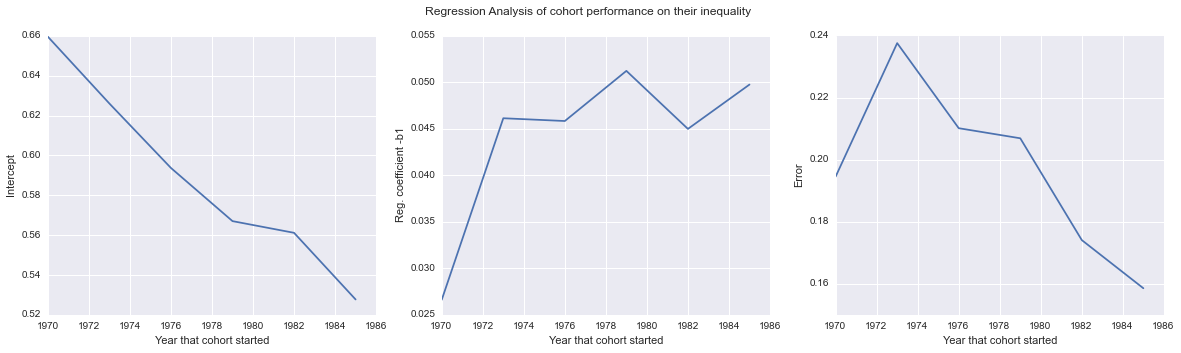

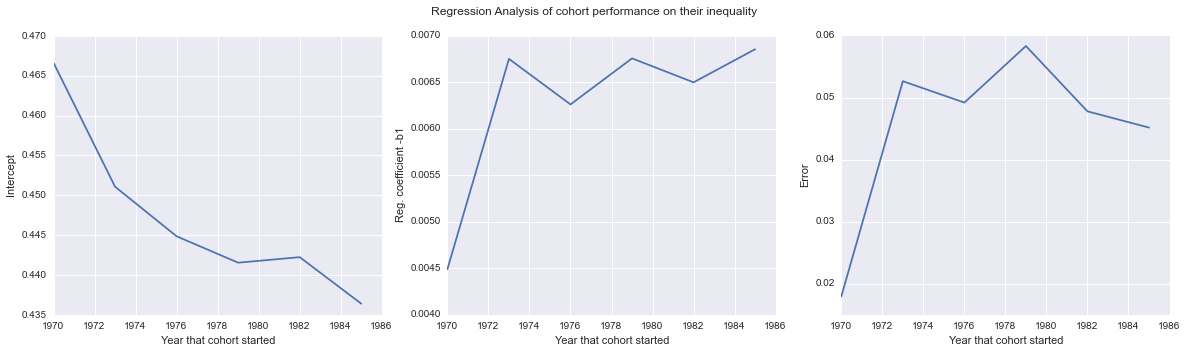

In [14]:
groupByYearData = authorPublicationData.copy(deep=True)
print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))
groupByYearData = calculate.groupDataAndCalculateCumulativeValues(groupByYearData, 3, 'num_pub')
print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))

plot.plot_cohort_analysis_on(groupByYearData, 'num_pub', 10, 'Publications Count')
plot.plot_cohort_analysis_on(groupByYearData, 'cum_num_pub', 10, 'Cumulative Publications Count')
data1 = plot.plot_regress_performance_on_inequality(groupByYearData, 'num_pub', 10)
data2 = plot.plot_regress_performance_on_inequality(groupByYearData, 'cum_num_pub', 10)